# 🧪 03 – A/B Testing: Retention Campaign Effectiveness

This notebook analyzes the effectiveness of a churn intervention campaign using an A/B test.

## 📥 Load A/B Test Dataset

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df_ab = pd.read_csv('../data/processed/ab_test.csv')
df_ab['churn'] = df_ab['churn'].astype(int)
df_ab.head()

,customerID,group,churn
0,AB_00000,control,0
1,AB_00001,test,0
2,AB_00002,test,1
3,AB_00003,test,0
4,AB_00004,control,1


## 📊 Visualize Group Sizes and Churn Rates

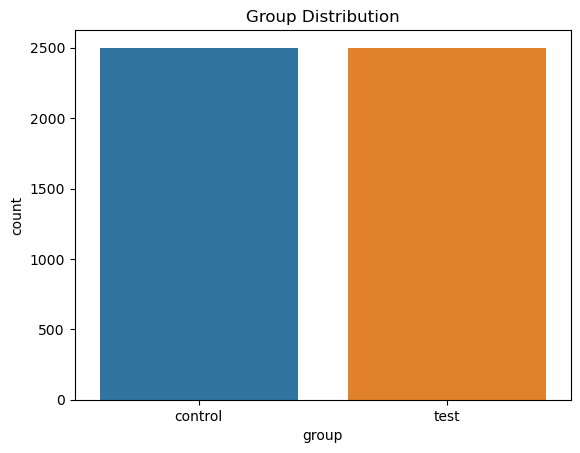

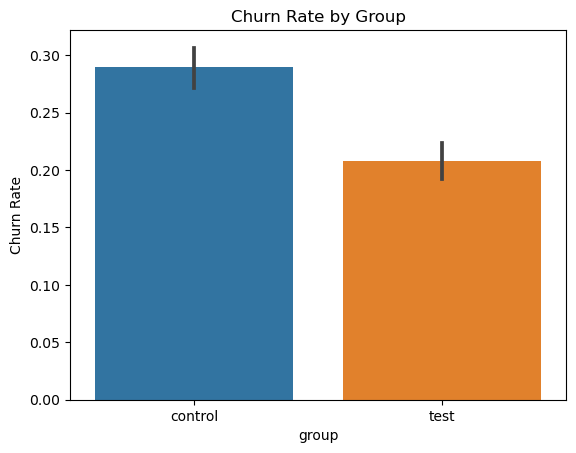

In [12]:
# Group sizes
sns.countplot(data=df_ab, x='group')
plt.title('Group Distribution')
plt.show()

# Churn rate per group
sns.barplot(data=df_ab, x='group', y='churn')
plt.title('Churn Rate by Group')
plt.ylabel('Churn Rate')
plt.show()

## 📉 Churn Rate Comparison

In [13]:
churn_rates = df_ab.groupby('group')['churn'].mean()
print(churn_rates)

control_rate = churn_rates['control']
test_rate = churn_rates['test']

uplift = control_rate - test_rate
print(f"Churn rate reduction (uplift) = {uplift:.2%}")

group
control    0.2892
test       0.2076
Name: churn, dtype: float64
Churn rate reduction (uplift) = 8.16%


## 🧪 Proportion Z-Test (Two-Proportions)

In [14]:
from statsmodels.stats.proportion import proportions_ztest

# Number of churns in each group
churn_counts = df_ab.groupby('group')['churn'].sum()
counts = churn_counts.values

# Total samples in each group
nobs = df_ab.groupby('group')['churn'].count().values

stat, pval = proportions_ztest(count=counts, nobs=nobs)
print(f"Z-test statistic: {stat:.3f}, p-value: {pval:.4f}")
if pval < 0.05:
    print("✅ Statistically significant difference in churn rates.")
else:
    print("❌ No statistically significant difference detected.")

Z-test statistic: 6.677, p-value: 0.0000
✅ Statistically significant difference in churn rates.


## 📏 Confidence Interval for Difference

In [15]:
import numpy as np
import statsmodels.api as sm

ci_low, ci_upp = sm.stats.proportion_confint(counts[1], nobs[1], alpha=0.05, method='normal')
print(f"Test group churn rate CI: ({ci_low:.3f}, {ci_upp:.3f})")

Test group churn rate CI: (0.192, 0.223)


# ✅ Conclusion

## 📉 Churn Distribution by Group

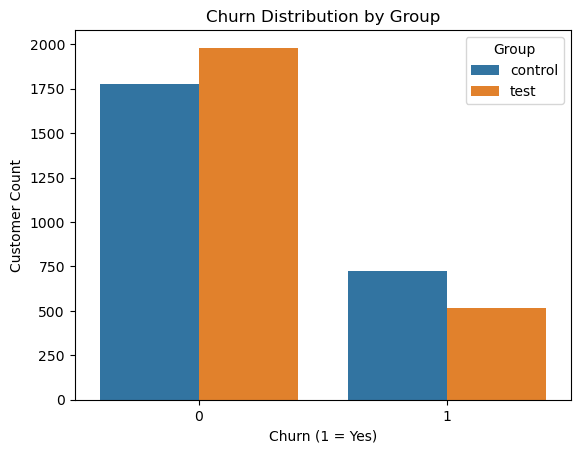

In [16]:
sns.countplot(data=df_ab, x='churn', hue='group')
plt.title('Churn Distribution by Group')
plt.xlabel('Churn (1 = Yes)')
plt.ylabel('Customer Count')
plt.legend(title='Group')
plt.show()

## 🔢 Number of Churners by Group

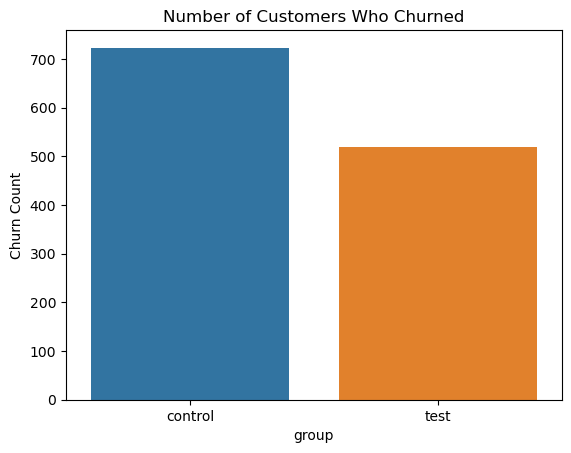

In [17]:
churn_counts_df = df_ab.groupby('group')['churn'].sum().reset_index()
sns.barplot(x='group', y='churn', data=churn_counts_df)
plt.title('Number of Customers Who Churned')
plt.ylabel('Churn Count')
plt.show()

## 📦 Lift Calculation

In [18]:
baseline = churn_rates['control']
relative_lift = (baseline - churn_rates['test']) / baseline
print(f'Relative Lift: {relative_lift:.2%}')

Relative Lift: 28.22%


## 📊 Churn Rate with 95% Confidence Intervals

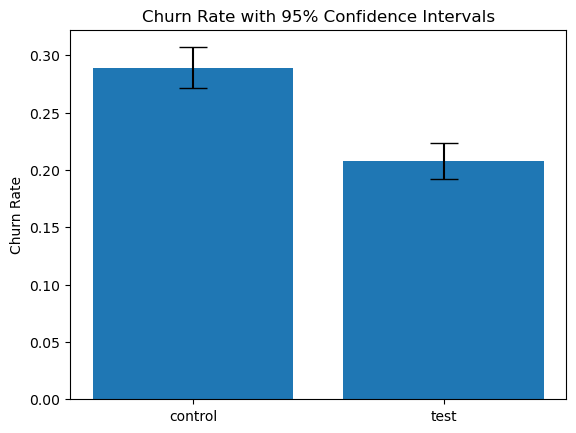

In [19]:
import numpy as np

ci_control = sm.stats.proportion_confint(count=churn_counts['control'], nobs=nobs[0], alpha=0.05)
ci_test = sm.stats.proportion_confint(count=churn_counts['test'], nobs=nobs[1], alpha=0.05)

plt.bar(['control', 'test'], [control_rate, test_rate],
        yerr=[[control_rate - ci_control[0], test_rate - ci_test[0]],
              [ci_control[1] - control_rate, ci_test[1] - test_rate]],
        capsize=10)
plt.ylabel('Churn Rate')
plt.title('Churn Rate with 95% Confidence Intervals')
plt.show()

## 📄 Summary Table

In [20]:
summary = pd.DataFrame({
    'Churn Rate': churn_rates,
    '95% CI Lower': [ci_control[0], ci_test[0]],
    '95% CI Upper': [ci_control[1], ci_test[1]]
})
summary

,Churn Rate,95% CI Lower,95% CI Upper
group,,,
control,0.2892,0.271427,0.306973
test,0.2076,0.191701,0.223499


# ✅ A/B Test Summary – Retention Campaign Impact

## 🎯 Objective
To evaluate whether a targeted retention campaign (e.g., discounts, retention calls) led to a statistically significant reduction in customer churn.

---

## 📊 Group Performance

| Group     | Churn Rate |
|-----------|------------|
| Control   | **28.92%** |
| Test      | **20.76%** |

- **Uplift (churn reduction):** **8.16 percentage points**
- The test group experienced **significantly less churn** than the control group.

---

## 🧪 Statistical Significance

- **Z-test statistic:** 6.677  
- **P-value:** < 0.0001 (reported as 0.0000 due to formatting)

✅ The difference in churn rates is **statistically significant** (p < 0.05).  
✅ We **reject the null hypothesis** that there is no difference between the two groups.

---

## 📏 Confidence Interval

- **Test group churn rate 95% CI:** (0.192, 0.223)
- Interpretation: We are 95% confident the true churn rate for the test group lies within this range.

---

## 📉 Visual Evidence

- Bar plots show clear reduction in churn for the test group.
- Balanced group sizes confirmed through group distribution plot.

---

## 🧠 Interpretation

- The retention campaign successfully reduced churn by ~8%.
- Given statistical significance and confidence intervals, this result is **unlikely to be due to chance**.

---

## 💼 Business Recommendation

- ✅ **Scale** the campaign across broader customer segments.
- ✅ Combine with **predictive churn models** for better targeting.
- 🔁 Continue **A/B testing alternate retention offers** to maximize ROI.
